In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap


In [2]:
ticker = 'MSFT'
ivs_df = pd.read_csv(f'./data/stock_data/IVS_{ticker}.csv')
ivs_df

,secid,date,days,delta,impl_volatility,impl_strike,impl_premium,dispersion,cp_flag,cusip,ticker,sic,index_flag,industry_group
0,107525,2010-01-04,10,-90,NaN,0.0000,0.00000,NaN,P,59491810,MSFT,7372,0,NaN
1,107525,2010-01-04,10,-85,NaN,0.0000,0.00000,NaN,P,59491810,MSFT,7372,0,NaN
2,107525,2010-01-04,10,-80,NaN,0.0000,0.00000,NaN,P,59491810,MSFT,7372,0,NaN
3,107525,2010-01-04,10,-75,NaN,0.0000,0.00000,NaN,P,59491810,MSFT,7372,0,NaN
4,107525,2010-01-04,10,-70,NaN,0.0000,0.00000,NaN,P,59491810,MSFT,7372,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129849,107525,2021-12-31,730,70,0.312330,292.9153,79.19659,0.013012,C,59491810,MSFT,7372,0,NaN
1129850,107525,2021-12-31,730,75,0.322237,272.8985,91.94205,0.016845,C,59491810,MSFT,7372,0,NaN
1129851,107525,2021-12-31,730,80,0.334747,250.8059,107.29410,0.021519,C,59491810,MSFT,7372,0,NaN
1129852,107525,2021-12-31,730,85,0.349430,225.6096,126.07140,0.026028,C,59491810,MSFT,7372,0,NaN


# This part will be used to create an IVS dataframe

In [47]:
ticker = 'SPX'
ivs_df = pd.read_csv(f'./data/stock_data/IVS_{ticker}.csv')
ivs_df
#Count the number of NaN values in the implied volatilities

vol_nan_count = ivs_df['impl_volatility'].isna().sum()

print(vol_nan_count, 'NaN values')
print(100*vol_nan_count/len(ivs_df), '% of the data has NaN values')


#drop the columns with no implied vol visible
ivs_df = ivs_df.dropna(subset=['impl_volatility'])

#keep the columns with the specified grid points
#TODO take into account also put values in the delta calc
grid_points = [[30, 60, 91, 182, 273, 365, 547, 730], [10, 25, 50, 75, 90]]
filtered_df = ivs_df[(ivs_df['days'].isin(grid_points[0])) & (ivs_df['delta'].isin(grid_points[1]))]

print('Went from:', len(ivs_df), 'rows, to ', len(filtered_df), 'rows')

#Checks if every unique date has 40 points
len(filtered_df)/40 == filtered_df['date'].nunique()

#Write the IVS Df to a csv
filtered_df.to_csv(f'./data/to_use/{ticker}')

9860 NaN values
0.8726791249134844 % of the data has NaN values
Went from: 1119994 rows, to  120840 rows


# This part is for plotting some descriptive statistics

In [48]:
statistics = filtered_df.describe()

# Display the descriptive statistics
pd.set_option('display.float_format', lambda x: '%.4f' % x)
print(statistics)


            secid        days       delta  impl_volatility  impl_strike  \
count 120840.0000 120840.0000 120840.0000      120840.0000  120840.0000   
mean  108105.0000    284.7500     50.0000           0.1906    2211.5556   
std        0.0000    233.7496     29.8330           0.0730     954.3709   
min   108105.0000     30.0000     10.0000           0.0537     481.3627   
25%   108105.0000     83.2500     25.0000           0.1353    1468.8035   
50%   108105.0000    227.5000     50.0000           0.1759    2061.3300   
75%   108105.0000    410.5000     75.0000           0.2318    2743.3650   
max   108105.0000    730.0000     90.0000           0.9275    6472.9990   

       impl_premium  dispersion         cusip         sic  index_flag  \
count   120840.0000 120840.0000   120840.0000 120840.0000 120840.0000   
mean       199.8682      0.0194 64881510.0000   9999.0000      1.0000   
std        271.4038      0.0207        0.0000      0.0000      0.0000   
min          1.7454      0.0016 

In [16]:
full_liq_df = pd.read_csv(f'./data/stock_data/liquidity.csv')

In [39]:
# Create a new DataFrame containing only rows where 'C' is present in 'option_type'
new_df = liq_df[liq_df['cp_flag'] == 'C']

# Display the new DataFrame
ticker_list = ['MSFT', 'TSLA', 'XOM', 'SPX']
for t in ticker_list:
    
    single_liq_df = new_df[new_df['ticker'] == t]
    stats = single_liq_df.describe()
    
    # Set the display format to show numbers in "normal" format
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    print(f'PRINTING STATS FOR TICKER {t}')
    print(stats)
pd.reset_option('display.float_format')


PRINTING STATS FOR TICKER MSFT
          secid  index_flag     volume  open_interest
count   3021.00     3021.00    3021.00        3021.00
mean  107525.00        0.00  120187.62     1484548.36
std        0.00        0.00  165583.41      506094.45
min   107525.00        0.00   12391.00      615813.00
25%   107525.00        0.00   50780.00     1032774.00
50%   107525.00        0.00   80865.00     1360209.00
75%   107525.00        0.00  141373.00     1890156.00
max   107525.00        0.00 5549657.00     2771831.00
PRINTING STATS FOR TICKER TSLA
          secid  index_flag     volume  open_interest
count   2893.00     2893.00    2893.00        2893.00
mean  143439.00        0.00  149556.90      604026.92
std        0.00        0.00  246391.89      806183.28
min   143439.00        0.00     123.00           0.00
25%   143439.00        0.00   21359.00      172640.00
50%   143439.00        0.00   59883.00      330736.00
75%   143439.00        0.00  126697.00      589574.00
max   143439.00     

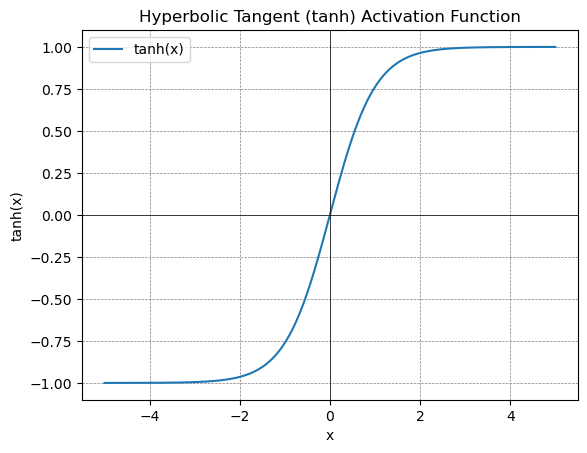

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Define the tanh activation function
def tanh(x):
    return np.tanh(x)

# Generate x values
x_values = np.linspace(-5, 5, 1000)

# Calculate corresponding y values using the tanh function
y_values = tanh(x_values)

# Plot the tanh activation function
plt.plot(x_values, y_values, label='tanh(x)')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('Hyperbolic Tangent (tanh) Activation Function')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

# This part will be used to create the IVS dataframe for ALL tickers

In [5]:
ticker_list = ['TSLA', 'XOM', 'SPX', 'MSFT']
big_df = pd.DataFrame()
for t in ticker_list:
    ticker_df = pd.read_csv(f'./data/stock_data/IVS_{t}.csv')
    big_df = big_df.append(ticker_df)

/var/folders/g2/dx64r05j44x92cwyb13qp2rm0000gp/T/ipykernel_48821/1340882375.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big_df = big_df.append(ticker_df)
/var/folders/g2/dx64r05j44x92cwyb13qp2rm0000gp/T/ipykernel_48821/1340882375.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big_df = big_df.append(ticker_df)
/var/folders/g2/dx64r05j44x92cwyb13qp2rm0000gp/T/ipykernel_48821/1340882375.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big_df = big_df.append(ticker_df)
/var/folders/g2/dx64r05j44x92cwyb13qp2rm0000gp/T/ipykernel_48821/1340882375.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big_df = big_df.append(ticker_

In [7]:
#Count the number of NaN values in the implied volatilities

vol_nan_count = big_df['impl_volatility'].isna().sum()

print(vol_nan_count, 'NaN values')
print(100*vol_nan_count/len(big_df), '% of the data has NaN values')


71910 NaN values
1.6081693482161867 % of the data has NaN values


In [8]:
#drop the columns with no implied vol visible
big_df = big_df.dropna(subset=['impl_volatility'])

#keep the columns with the specified grid points
#TODO take into account also put values in the delta calc
grid_points = [[30, 60, 91, 182, 273, 365, 547, 730], [10, 25, 50, 75, 90]]
filtered_df = big_df[(big_df['days'].isin(grid_points[0])) & (big_df['delta'].isin(grid_points[1]))]

print('Went from:', len(big_df), 'rows, to ', len(filtered_df), 'rows')

Went from: 4399634 rows, to  478240 rows


In [13]:
filtered_df

,secid,date,days,delta,impl_volatility,impl_strike,impl_premium,dispersion,cp_flag,cusip,ticker,sic,index_flag,industry_group,exchange_d,issue_type
51,143439,2010-07-08,30,10,0.973781,25.97244,0.206498,0.033897,C,88160R10,TSLA,3711,0,NaN,NaN,NaN
54,143439,2010-07-08,30,25,0.954301,21.80862,0.625211,0.013272,C,88160R10,TSLA,3711,0,NaN,NaN,NaN
59,143439,2010-07-08,30,50,0.933527,18.10286,1.591051,0.012449,C,88160R10,TSLA,3711,0,NaN,NaN,NaN
64,143439,2010-07-08,30,75,0.884698,15.19970,3.019993,0.017680,C,88160R10,TSLA,3711,0,NaN,NaN,NaN
67,143439,2010-07-08,30,90,0.834694,13.22567,4.458136,0.041515,C,88160R10,TSLA,3711,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129837,107525,2021-12-31,730,10,0.265159,584.73940,5.164919,0.004336,C,59491810,MSFT,7372,0,NaN,NaN,NaN
1129840,107525,2021-12-31,730,25,0.270648,469.11910,16.097940,0.004841,C,59491810,MSFT,7372,0,NaN,NaN,NaN
1129845,107525,2021-12-31,730,50,0.287194,364.94270,43.332830,0.007723,C,59491810,MSFT,7372,0,NaN,NaN,NaN
1129850,107525,2021-12-31,730,75,0.322237,272.89850,91.942050,0.016845,C,59491810,MSFT,7372,0,NaN,NaN,NaN


In [20]:
df_sorted = filtered_df.sort_values(by=['date', 'ticker', 'delta', 'days'])

# Reset the index to get a new ordered index
df_sorted = df_sorted.reset_index(drop=True)

# Print the resulting DataFrame
df_sorted.head(122)

,secid,date,days,delta,impl_volatility,impl_strike,impl_premium,dispersion,cp_flag,cusip,ticker,sic,index_flag,industry_group,exchange_d,issue_type
0,107525,2010-01-04,30,10,0.234163,33.81368,0.095659,0.002137,C,59491810,MSFT,7372,0,NaN,NaN,NaN
1,107525,2010-01-04,60,10,0.232224,34.95747,0.131974,0.004911,C,59491810,MSFT,7372,0,NaN,NaN,NaN
2,107525,2010-01-04,91,10,0.222302,35.76853,0.155448,0.002552,C,59491810,MSFT,7372,0,NaN,NaN,NaN
3,107525,2010-01-04,182,10,0.231295,38.40234,0.223781,0.003666,C,59491810,MSFT,7372,0,NaN,NaN,NaN
4,107525,2010-01-04,273,10,0.234211,40.56876,0.273189,0.003123,C,59491810,MSFT,7372,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,104533,2010-01-04,365,90,0.261040,52.31352,17.389280,0.011460,C,NaN,XOM,2911,0,NaN,1.0,0.0
118,104533,2010-01-04,547,90,0.264425,49.26198,20.546560,0.007805,C,NaN,XOM,2911,0,NaN,1.0,0.0
119,104533,2010-01-04,730,90,0.266066,46.84842,23.053390,0.004267,C,NaN,XOM,2911,0,NaN,1.0,0.0
120,107525,2010-01-05,30,10,0.233823,33.82015,0.095555,0.003113,C,59491810,MSFT,7372,0,NaN,NaN,NaN


In [22]:
#Write the IVS Df to a csv
df_sorted.to_csv(f'./data/to_use/ALL')

# This section is only for visualisation purposes

In [63]:
first_date_df = filtered_df.loc[filtered_df['date'] == '2010-01-04']
corona_date_df = filtered_df.loc[filtered_df['date'] == '2020-03-18']

ivs_of_interest = corona_date_df

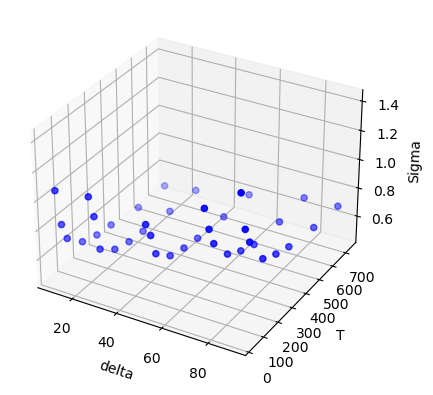

In [64]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D plane
ax.scatter(ivs_of_interest['delta'], ivs_of_interest['days'], ivs_of_interest['impl_volatility'], c='b', marker='o')

# Set labels for the axes
ax.set_xlabel('delta')
ax.set_ylabel('T')
ax.set_zlabel('Sigma')

# Display the 3D plot
plt.show()

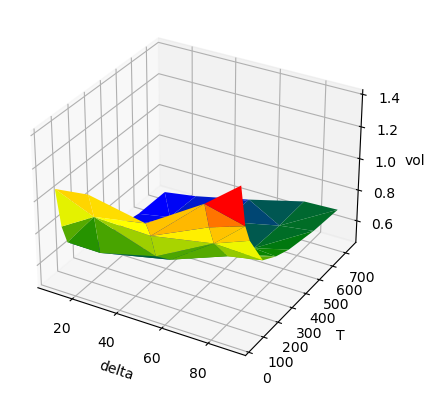

In [65]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a connected 3D plane based on the filtered data
colors = [(0, 'blue'), (0.3, 'green'), (0.6, 'yellow'), (0.8, 'orange'), (1, 'red')]
cmap = LinearSegmentedColormap.from_list("CustomColormap", colors)

ax.plot_trisurf(ivs_of_interest['delta'], ivs_of_interest['days'], ivs_of_interest['impl_volatility'], cmap=cmap)

# Set labels for the axes
ax.set_xlabel('delta')
ax.set_ylabel('T')
ax.set_zlabel('vol')

# Display the 3D plot
plt.show()